# Part A

### 1. Implement the following function that generates the polynomial and interaction features for a given degree of the polynomial.

In [98]:
from itertools import combinations
from itertools import combinations_with_replacement
import pandas as pd
import numpy as np
import decimal as dec
import matplotlib.pyplot as plt
from math import ceil, sqrt, floor
import tabulate as tb


def polynomialFeatures(X, degree):
    poly = X.copy()
    columns = X.columns
    if degree == 0 :
        return poly
    if degree == 1:
        return poly
    if degree == 2:
        for combination in combinations_with_replacement(columns, degree):
            combination_string = " ".join(combination)
            poly[combination_string] = poly[combination[1]] * poly[combination[0]]
        return X
    if degree == 3:
        for combination in combinations_with_replacement(columns, degree):
            combination_string = " ".join(combination)
            poly[combination_string] =poly[combination[2]] * poly[combination[1]] * poly[combination[0]]   
        return poly

from math import ceil, sqrt, floor
# Used Code from last assignment
def partition (data,targ_vector,t):
    test_lengths = ceil((1-t) * len(data))
    x_test = data[:test_lengths].copy()
    y_test = targ_vector[:test_lengths].copy()
    
    x_train = data[test_lengths:].copy()
    y_train = targ_vector[test_lengths:].copy()

 
    return x_test , y_test, x_train , y_train

### This is the Function for Part C, but I added it here b/c we use this 
### function before part C

def kfold(k, X, y, model, model_args, error_function):
    dictionary_from_folds = {}
    error_train = []
    error_validation = []
    for values in range(k):
        working_X = X.copy()
        working_y = y.copy()
        x_validation = working_X[values]
        y_validation = working_y[values]
        del working_X[values]
        del working_y[values]
        x_train_ = np.concatenate(working_X)
        y_train_ = np.concatenate(working_y)
        
        
        Linear_regression = model()
        
        train_prediction = Linear_regression.fit(x_train_, y_train_, **model_args)
        validation_prediction = Linear_regression.fit(x_validation, y_validation, **model_args)
        
        train_mse = error_function(train_prediction, y_train_)
        validation_mse = error_function(validation_prediction , y_validation)
        
        error_train.append(train_mse)
        error_validation.append(validation_mse)
        
        
    average_error_train = sum(error_train)/len(error_train)
    average_error_validation = sum(error_validation) / len(error_validation)
    RMSE_train = np.sqrt(average_error_train)
    RMSE_validation = np.sqrt(average_error_validation)
    dictionary_from_folds['Average Error'] = average_error_train , average_error_validation 
    dictionary_from_folds['RMSE'] = RMSE_train, RMSE_validation
    dictionary_from_folds['Prediction'] = train_prediction, validation_prediction
    return (dictionary_from_folds)

### 2. Implement the following function to calculate and return the mean squared error (mse) of two vectors. 

In [3]:
def mse(pred , true):
    m = pred.shape[0]
    MSE_ = np.sum(((true - pred)**2))
    MSE = MSE_ / m
    return MSE

### 3. Implement the following function to compute training and validation errors. It will be used to plot learning curves.The function takes the feature matrix X (usually the training data matrix) and the training size (from the “train_size” parameter) and by using cross-validation computes the average mse for the training fold and the validation fold. It iterates through the entire X with an increment step of the “train_size

In [97]:
def learning_curve(model, X, Y, cv, train_sizes, epochs, tol, hyperparemeter_tuning, lambd, learning_rate, regularizer, **kwargs):
    max_value = 1.0
    number = int(max_value / train_sizes)
    train_size_range = np.linspace(train_sizes, max_value, number)
    MSE_train = []
    MSE_validation = []
    ### I created this variable in order to distinguish between tuning 
    ### and Outcome plotting
    ### Although they both do the same things it is easier to divide it
    if hyperparemeter_tuning == 1:
        matrix_train = np.zeros((number, 48))
        matrix_validation = np.zeros((number,48))
        row = 0
        for size in train_size_range:
            martix_train_row = []
            matrix_validation_row = []
            test_length = int(size *len(X))
            x_train_size_incremental = X[:test_length]
            y_train_size_incremental = Y[:test_length]
            x_train_fold_split = np.array_split(x_train_size_incremental,cv)
            y_train_fold_split = np.array_split(y_train_size_incremental,cv)
            Hyper_test_number = 0
            Combinations_of_Hypers = []
            for values in [1.0,0,0.1,0.01,0.001,0.0001]:
                for rate in [0.1, 0.01, 0.001, 0.0001]:
                    for reg in ['l1','l2']:
                        
                        ### The dictionary can be stored, and it is stored in the form of 
                        ### the matrix that is being created, In order to look at it just 
                        ### add the matrix to the return and you'll get the read out for it 
                        
                        
                        model_args = {'epochs': 1000, 'tol': None,'lambd':values, 'learning_rate':rate,'regularizer':reg}
                        dictionary = kfold(cv, x_train_fold_split, y_train_fold_split, model, model_args, mse)
                        Combinations_of_Hypers.append([f'{model_args}'])
                        average_train = dictionary['Average Error'][0]
                        average_validation = dictionary['Average Error'][1]
                        print("Size", size, "Index Number", Hyper_test_number, "Running:", model_args)
                        print("Average Error For Train", average_train)
                        print("Average Error for Validation", average_validation)
                        MSE_train.append(average_validation)
                        MSE_validation.append(average_validation)
                        martix_train_row.append(average_train)
                        matrix_validation_row.append(average_validation)
                        
                        Hyper_test_number += 1
            matrix_train[row] = martix_train_row
            matrix_validation[row] = matrix_validation_row
            row += 1
            
        train_DF = pd.DataFrame(matrix_train)
        validation_DF = pd.DataFrame(matrix_validation)  
        new_data_matrix = train_DF + validation_DF 
        hyper_parameter = new_data_matrix.T
        hyper_parameter["sum"] = hyper_parameter.sum(axis=1)
        hyper_parameter["Average"] = hyper_parameter["sum"] / 5
        without_missing_values = hyper_parameter.dropna()
        values = without_missing_values.idxmin()
        print("Optimal Parameter", Combinations_of_Hypers[values["Average"]])
                 
    elif  hyperparemeter_tuning == 0:
        matrix_train = np.zeros(number)
        matrix_validation = np.zeros(number)
        row = 0
        for values in train_size_range:
            martix_train_row = []
            matrix_validation_row = []
            test_length = int(values *len(X))
            x_train_size_incremental = X[:test_length]
            y_train_size_incremental = Y[:test_length]
            x_train_fold_split = np.array_split(x_train_size_incremental,cv)
            y_train_fold_split = np.array_split(y_train_size_incremental,cv)

            model_args = {'epochs': 1000, 'tol': None, 'lambd':lambd, 'learning_rate': learning_rate, 'regularizer':regularizer}
            
            dictionary = kfold(cv, x_train_fold_split, y_train_fold_split, model, model_args, mse)
            
            list_of_keys = list(dictionary.keys())
            average_train = dictionary[list_of_keys[0]][0]
            average_validation = dictionary[list_of_keys[0]][1]
            print("Size", values, "Running:", model_args)
            print("Average Error For Train", average_train)
            print("Average Error for Validation", average_validation)
            MSE_train.append(average_train)
            MSE_validation.append(average_validation)
            matrix_train[row]= average_train
            matrix_validation[row] = average_validation
            row += 1
        train_DF = pd.DataFrame(matrix_train)
        validation_DF = pd.DataFrame(matrix_validation)  
    return np.sqrt(matrix_train), np.sqrt(matrix_validation)
            
        

### 4. Implement a Linear_Regression model class. It should have the following three methods. Note the that “fit” method should implement the batch gradient descent algorithm. [23pts

In [20]:
class Linear_Regression():
    def fit(self, X, Y,  epochs, tol,  lambd, learning_rate, regularizer, **kwargs):
        self.X = X
        self.Y = Y
        self.learning_rate = learning_rate
        self.epochs = epochs 
        self.tol = tol
        self.regularizer = regularizer
        self.lambd = lambd
        if regularizer == None:
            m = X.shape[0]
            X = np.vstack((np.ones((X.shape[0], )), X.T)).T
            #theta = np.zeros((X.shape[1], 1))
            theta = np.random.randn(X.shape[1],1)/np.sqrt(X.shape[1])
            cost_list = []
            if tol == None:
                for i in range(epochs):
                    y_pred = np.dot(X, theta)
                    cost = (1/(2*m)) *( np.sum(np.square(y_pred - Y)))
                    d_theta = (1/m)* (np.dot(X.T, y_pred - Y))
                    theta = theta - learning_rate * d_theta
                    cost_list.append(cost)

                self.theta = theta  
                return np.dot(X, theta)
            else: 
                for i in range (epochs):
                    y_pred = np.dot(X, theta)
                    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
                    d_theta = (1/m) * (np.dot(X.T, y_pred - Y))
                    theta = theta - (learning_rate * d_theta)
                    cost_list.append(cost)
                    if cost > cost_list[-1] - tol:
                        break
                    else:
                        continue
                self.theta = theta       
                return np.dot(X, theta)
            
        
        elif regularizer == "l1":
            m = Y.size
            theta = np.random.randn(X.shape[1],1)/np.sqrt(X.shape[1])
            cost_list = []
            if tol == None:
                for i in range(epochs):
                    y_pred = np.dot(X, theta)
                    cost = (1/(2*m)) * np.sum(np.square(y_pred - Y)) + ((lambd/ 2*m) * (np.sum(np.abs(theta))))
                    d_theta = (1/m) * np.dot(X.T, y_pred - Y)
                    theta = theta - ((learning_rate/m) * d_theta) - ((learning_rate *lambd)/m) *(np.sign(theta))
                    cost_list.append(cost)
            else:
                for i in range(epochs):
                    y_pred = np.dot(X, theta)
                    cost = (1/(2*m)) * np.sum(np.square(y_pred - Y)) + ((lambd/ 2*m) * (np.sum(np.abs(theta))))
                    d_theta = (1/m) * np.dot(X.T, y_pred - Y)
                    theta = theta - ((learning_rate/m) * d_theta) - ((learning_rate *lambd)/m) * np.sign(theta)
                    cost_list.append(cost)
                    if i == 2:
                        if cost > (cost_list[-1] - tol):
                            break
                        else:
                            continue
                    else: 
                        continue
            self.theta = theta   
            return np.dot(X,theta)
        elif regularizer == "l2":
            m = Y.size
            theta = np.random.randn(X.shape[1],1)/np.sqrt(X.shape[1])
            cost_list = []
            if tol == None:
                for i in range(epochs):
                    y_pred = np.dot(X, theta)
                    cost = (1/(2*m)) * np.sum((y_pred - Y)**2) + ((lambd/(2*m)) * (np.sum((theta)**2)))
                    d_theta = (1/m) * np.dot(X.T, y_pred - Y)
                    theta = theta - (learning_rate * d_theta) - ((learning_rate * lambd * theta) / m )
                    cost_list.append(cost)
            else:
                for i in range(epochs):
                    y_pred = np.dot(X, theta)
                    cost = (1/(2*m)) * np.sum((y_pred - Y)**2) + ((lambd / 2*m) * (np.sum((theta)**2)))
                    d_theta = (1/m) * np.dot(X.T, y_pred - Y)
                    theta = theta - (learning_rate * d_theta) + ((learning_rate * lambd * theta) / m )
                    cost_list.append(cost)
                    if i == 2:
                        if cost > (cost_list[-1] - tol):
                            break
                        else:
                            continue
                    else: 
                        continue
            self.theta = theta 
            return np.dot(X,theta)
    def predict(self, X):
        y_predict = np.dot(X, self.theta)
        return y_predict
        

## Part B: Data Processing 

#### 6. Read in the winequality-red.csv file as a Pandas data frame

In [21]:
df = pd.read_csv('winequality-white.csv', sep=";")

#### 7. Summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report

In [96]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### 8. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names.

In [23]:
shuffled_df = df.sample(frac=1)

#### 9. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any.

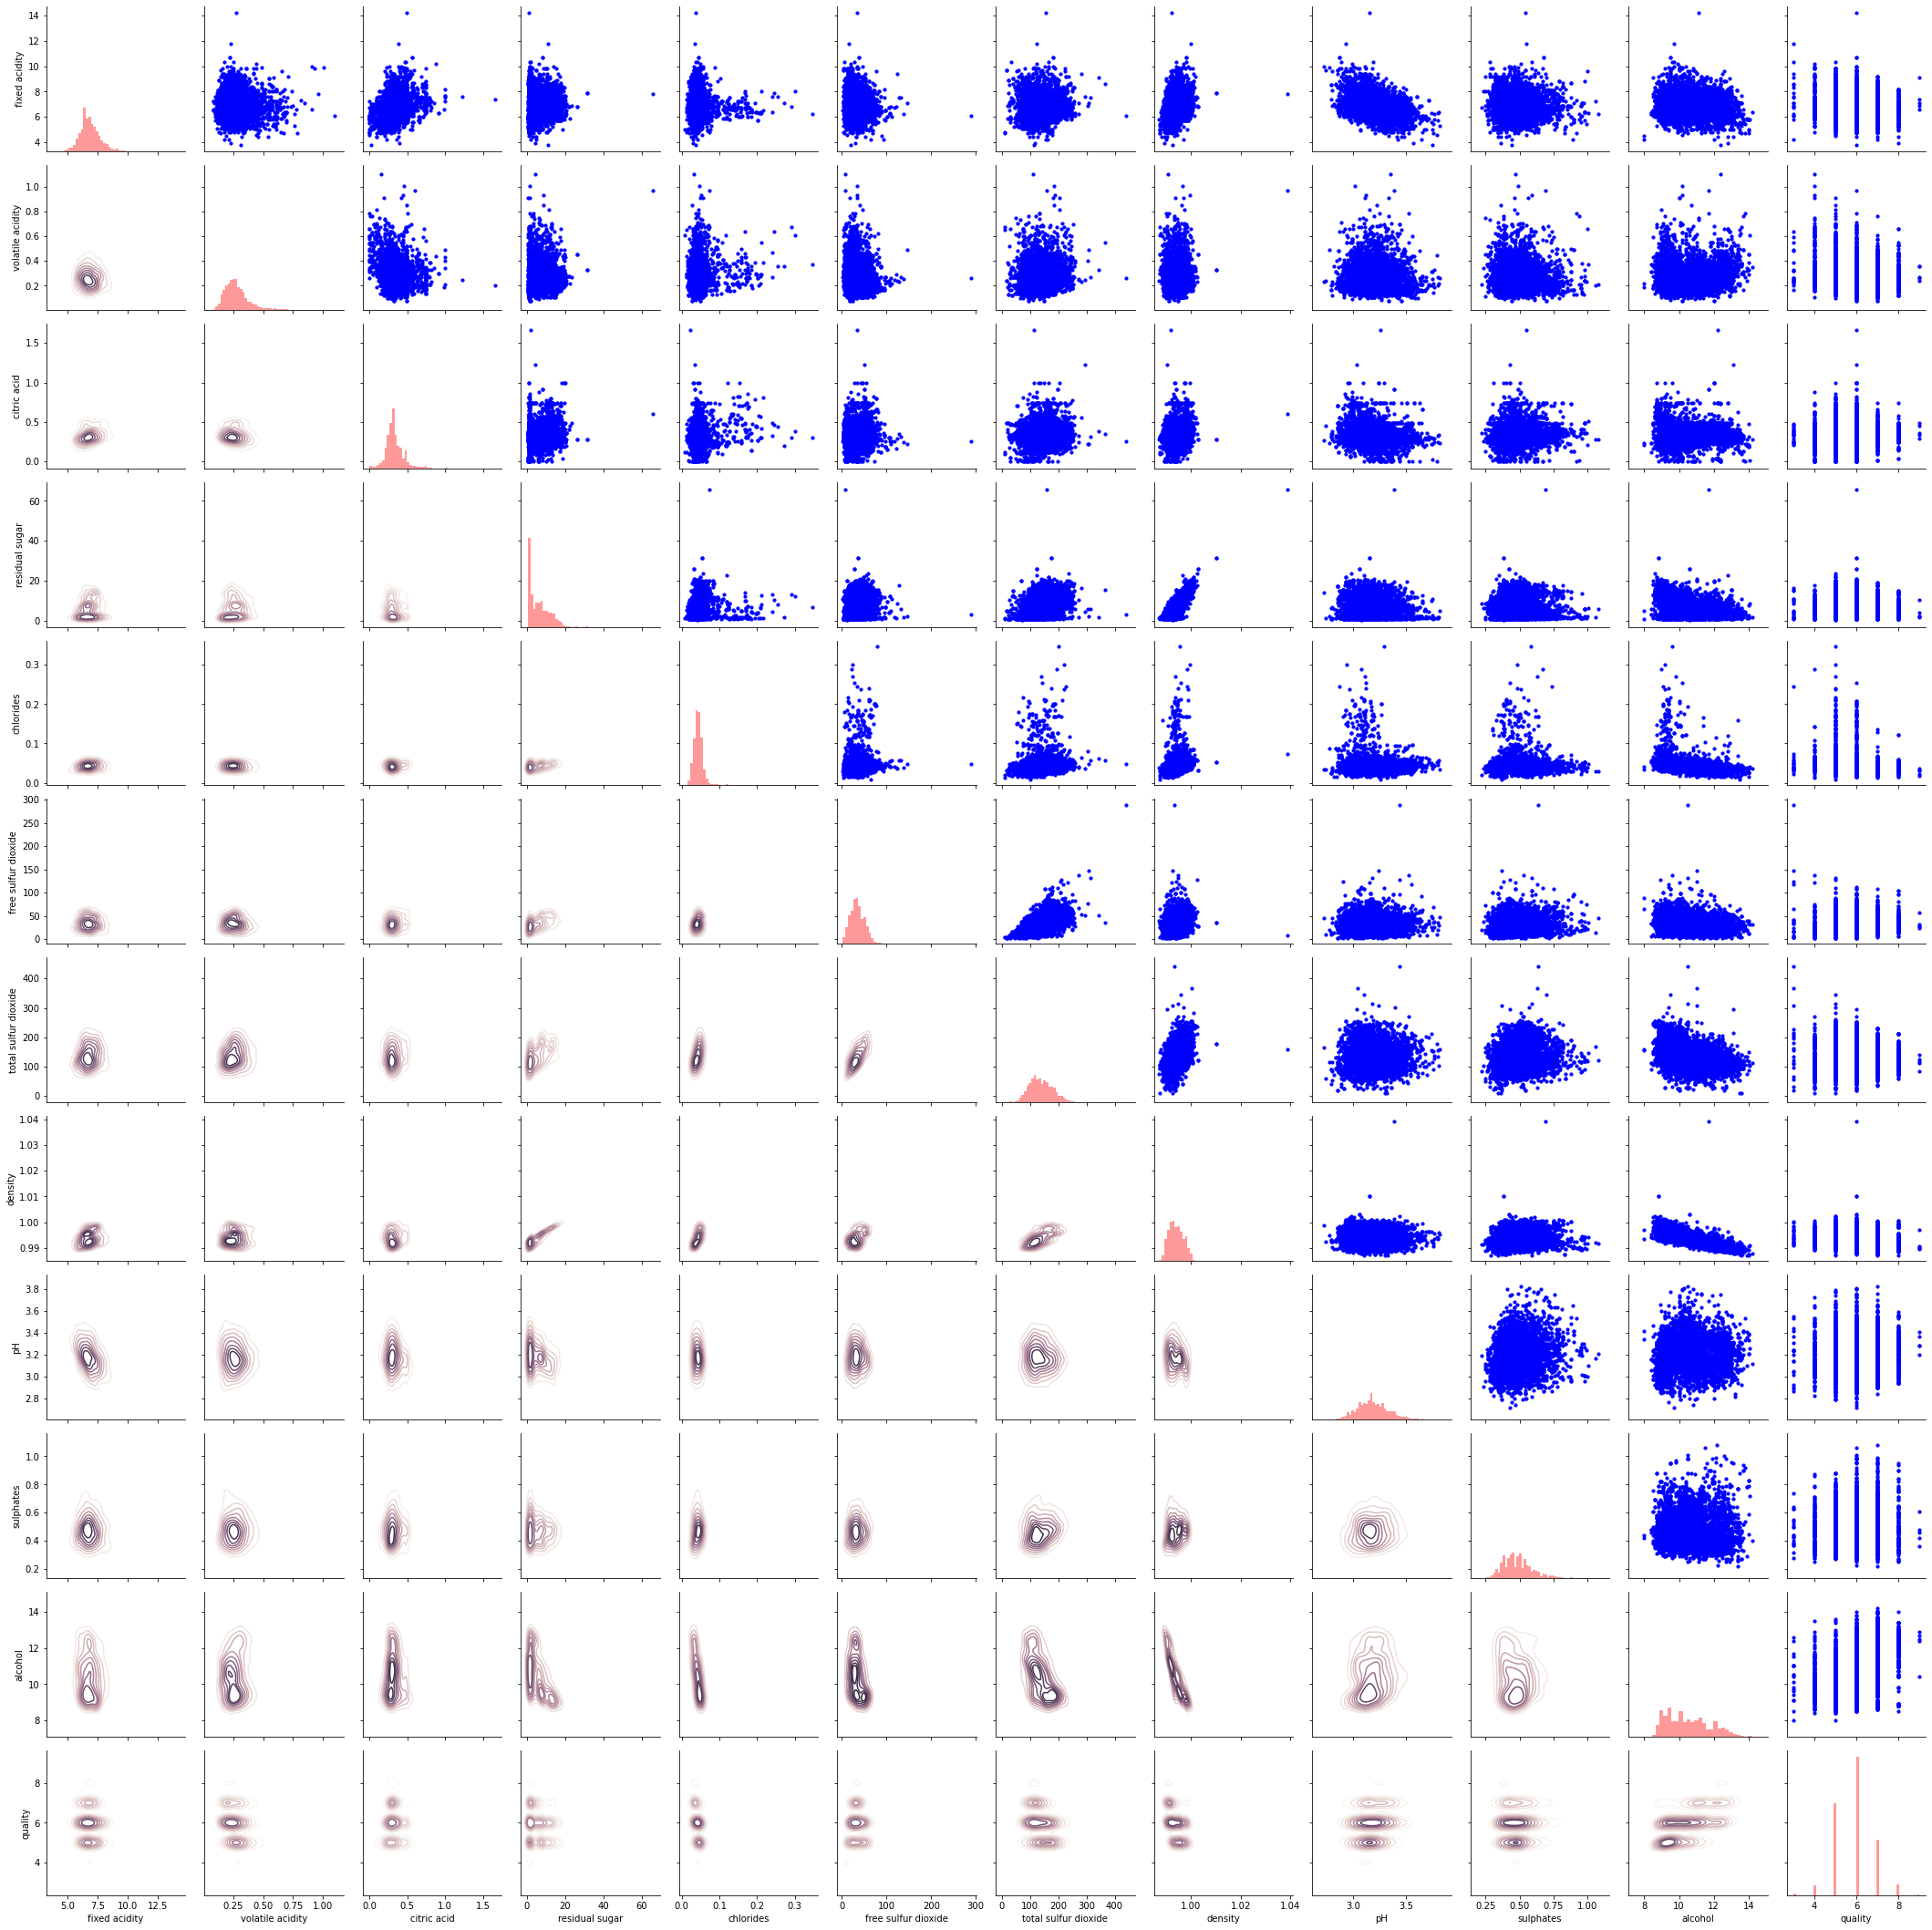

In [9]:
### From the Work Book
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(shuffled_df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'blue')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

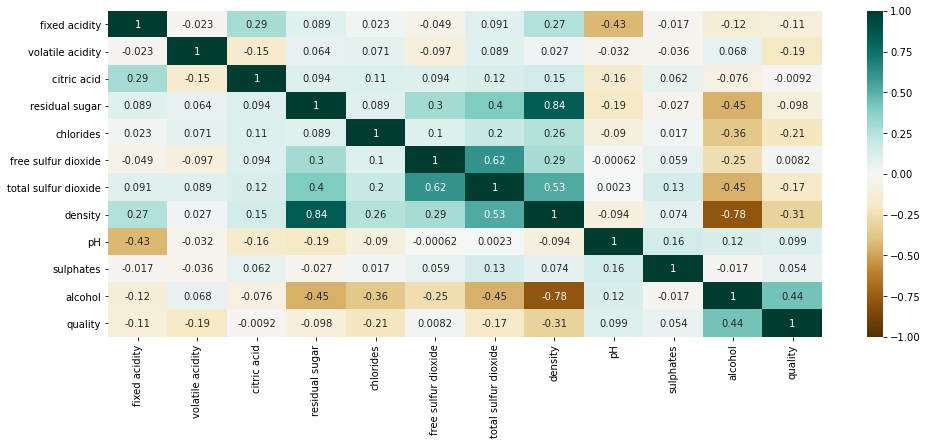

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(shuffled_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [24]:
most_valued = shuffled_df.corr().abs()['quality'].sort_values(ascending=False)
most_valued = most_valued[:7]
most_valued

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
Name: quality, dtype: float64

In [25]:
cut_downDF = shuffled_df.loc[:,most_valued.index]
final_dataframe = cut_downDF.drop_duplicates(keep= 'first')
X = final_dataframe.drop(columns='quality') 

# Standardized Data
X_standardized = X.apply(lambda x: (x - x.mean(axis = 0) ) / (np.std(x)))

# Labels are the same for both Standardized and Non
Y = final_dataframe['quality']
### Partitioned the data
x_test , y_test, x_train , y_train = partition(X,Y,0.2)
x_test_standardized , y_test, x_train_standardized , y_train = partition(X_standardized,Y,0.2)
y_train = np.vstack((np.ones((y_train.shape[0],))))
y_test = np.vstack((np.ones((y_test.shape[0],))))

In [26]:
print("Shape of Standardized X Train", x_train_standardized.shape)
print("Shape of Standardized X Test", x_test_standardized.shape)
print("Shape of Y Train", y_train.shape)
print("Shape of Y Test", y_test.shape)

Shape of Standardized X Train (791, 6)
Shape of Standardized X Test (3165, 6)
Shape of Y Train (791, 1)
Shape of Y Test (3165, 1)


In [27]:
print("Shape of X Train", x_train.shape)
print("Shape of X Test", x_test.shape)
print("Shape of Y Train", y_train.shape)
print("Shape of Y Test", y_test.shape)


Shape of X Train (791, 6)
Shape of X Test (3165, 6)
Shape of Y Train (791, 1)
Shape of Y Test (3165, 1)


In [28]:
### x_train , x_test = the Non standardized values 
### x_train_standardized , x_test_standadrzied are the values that are standardized

In [16]:
model = Linear_Regression()
tol = None
epoch = 1000
lambd = None 
learning_rate = 0.0001
regularizer = None
hyperparemeter_tuning = 0

print("Standardized")
train, validation, matrix_train, matrix_validation= learning_curve(Linear_Regression,x_train_standardized, y_train, 5, 0.2, epoch, tol, hyperparemeter_tuning, lambd, learning_rate, regularizer)

Standardized
Size 0.2 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 1.9942938455326007
Average Error for Validation 1.774146312750743
Size 0.4 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 1.6989996738647535
Average Error for Validation 1.4077803160591291
Size 0.6000000000000001 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 2.0935995841427646
Average Error for Validation 1.55583965369266
Size 0.8 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 1.3942488026146578
Average Error for Validation 1.9257550952122746
Size 1.0 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 1.3355260550467676
Average Error for Valid

In [17]:
print("Nonstandadrized")
model = Linear_Regression()
tol = None
epoch = 1000
lambd = None 
learning_rate = 0.0001
regularizer = None
hyperparemeter_tuning = 0
train, validation, matrix_train, matrix_validation= learning_curve(Linear_Regression, x_train, y_train, 5, 0.2, epoch, tol, hyperparemeter_tuning, lambd, learning_rate, regularizer)

Nonstandadrized
Size 0.2 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 1.4210643504912612e+108
Average Error for Validation 5.075815377892711e+227
Size 0.4 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 503.2487030104504
Average Error for Validation 5.033710001996411e+136
Size 0.6000000000000001 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 1.4000884772033434e+60
Average Error for Validation 2.6534122599290953e+174
Size 0.8 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 319796647.17159045
Average Error for Validation 1.494119816011084e+73
Size 1.0 Running: {'epochs': 1000, 'tol': None, 'lambd': None, 'learning_rate': 0.0001, 'regularizer': None}
Average Error For Train 1.9970629193

### Decided to use standardization because it appears that non standardizing have a higher average error compared to standardized values. 

# Part C. 

### kfold A Repeat, I added this function to the first function call in, bc we use it earlier. 

In [69]:
def kfold(k, X, y, model, model_args, error_function):
    dictionary_from_folds = {}
    error_train = []
    error_validation = []
    for values in range(k):
        working_X = X.copy()
        working_y = y.copy()
        x_validation = working_X[values]
        y_validation = working_y[values]
        del working_X[values]
        del working_y[values]
        x_train_ = np.concatenate(working_X)
        y_train_ = np.concatenate(working_y)
        
        
        Linear_regression = model()
        
        train_prediction = Linear_regression.fit(x_train_, y_train_, **model_args)
        validation_prediction = Linear_regression.fit(x_validation, y_validation, **model_args)
        
        train_mse = error_function(train_prediction, y_train_)
        validation_mse = error_function(validation_prediction , y_validation)
        
        error_train.append(train_mse)
        error_validation.append(validation_mse)
        
        
    average_error_train = sum(error_train)/len(error_train)
    average_error_validation = sum(error_validation) / len(error_validation)
    RMSE_train = np.sqrt(average_error_train)
    RMSE_validation = np.sqrt(average_error_validation)
    dictionary_from_folds['Average Error'] = average_error_train , average_error_validation 
    dictionary_from_folds['RMSE'] = RMSE_train, RMSE_validation
    dictionary_from_folds['Prediction'] = train_prediction, validation_prediction
    return (dictionary_from_folds)

### 10 Model selection via Hyperparameter tuning: Use the kFold function (known as sFoldfunction from previous assignment) to evaluate the performance of your model over each combination of lambda, learning_rate and regularizer from the following sets: 
#### a-d

In [70]:
dictionary = {} 
model = Linear_Regression()
tol = None
epoch = 1000
lambd = 0 
learning_rate = 0.001
regularizer = "l1"
hyperparemeter_tuning = 1 ### 0 = No, 1 == Yes
train_hyper, validation_hyper = learning_curve(Linear_Regression, x_train_standardized, y_train, 
                                                                                            5, 0.2, epoch, tol, hyperparemeter_tuning, 
                                                                                            lambd, learning_rate, regularizer)


Size 0.2 Index Number 0 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l1'}
Average Error For Train 0.9998704829017371
Average Error for Validation 0.9976482149349813
Size 0.2 Index Number 1 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train 0.9316051413554197
Average Error for Validation 0.7255175362541548
Size 0.2 Index Number 2 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l1'}
Average Error For Train 1.606802089781608
Average Error for Validation 1.0260217114783086
Size 0.2 Index Number 3 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l2'}
Average Error For Train 0.9321116059224759
Average Error for Validation 0.7354578952122058
Size 0.2 Index Number 4 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 1.9260920

### It appears after looking it over that both 41 and 9 have the same outcome, so i am going to be chosing 9:
### After checking over the outcomes, it would appear that the 41 and 9th row have the same outcomes, although this will give us the print out of 9. Just for reference they're considered to be the same. This makes sense because the only difference between them is the lambda, and even then the difference in lambda rate is so low that it shouldn't effect the out come as much. So i will be going with 9. 

### best hyperparameter = ``epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l2'``

## 11. Evaluate your model on the test data and report the mean squared error

### Mean Square Error

In [65]:
model = Linear_Regression()
tol = None
epoch = 1000
lambd = 0
learning_rate = 0.1
regularizer = "l2"
hyperparemeter_tuning = 0
linear_regression = model
linear_regression.fit(x_train_standardized, y_train, epoch, tol,  lambd, learning_rate, regularizer)
prediction = linear_regression.predict(x_test_standardized)


### Mean Squared Error on the Test Data

In [66]:
mse(prediction, y_test)

1.0106788907005684

### 12. Using the best model plot the learning curve. Use the rmse values obtained from the “learning_curve” function to plot this curve.

In [71]:
dictionary = {} 
model = Linear_Regression()
tol = None
epoch = 1000
lambd = 0
learning_rate = 0.1
regularizer = "l2"
hyperparemeter_tuning = 0 ### 0 = No, 1 == Yes
train, validation = learning_curve(Linear_Regression,x_train_standardized, y_train, 5, 0.2, epoch, tol, hyperparemeter_tuning, lambd, learning_rate, regularizer)


Size 0.2 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train 0.9315920320047727
Average Error for Validation 0.721879765394635
Size 0.4 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train 0.9738636286931879
Average Error for Validation 0.9188954987961442
Size 0.6000000000000001 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train 0.979809903291511
Average Error for Validation 0.9320699026101682
Size 0.8 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train 0.9821465261807425
Average Error for Validation 0.925986138736716
Size 1.0 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train 0.9901771639618318
Average Error for Validation 0.9295239275002984


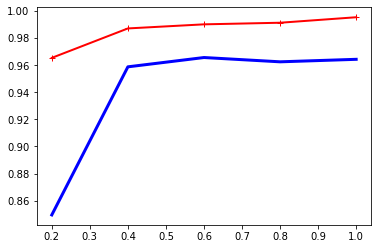

In [72]:
max_value = 1.0
train_sizes = 0.2
number = int(max_value / train_sizes)

train_size_range = np.linspace(train_sizes, max_value, number)
plt.plot (train_size_range, train, "r-+", linewidth = 2, label ='Test')
plt.plot(train_size_range , validation, "b-", linewidth = 3 , label = "validation ") 

#### ADD LABELS

## 13 Determine the best model hyperparameter values for the training data matrix with polynomial degree 3 and plot the learning curve. Use the rmse values obtained from the “learning_curve” function to plot this curve

In [73]:
#x_train_standardized
#x_test_standardized


### Used the function
X_train_poly = polynomialFeatures(x_train_standardized, 3)
X_test_poly = polynomialFeatures(x_test_standardized, 3)

#### Running Hyper Parameter test with a poly test 

In [77]:
dictionary = {} 
model = Linear_Regression()
tol = None
epoch = 1000
lambd = 0 
learning_rate = 0.0001
regularizer = "l1"
hyperparemeter_tuning = 1 ### 0 = No, 1 == Yes
train_poly_hyper, validation_poly_hyper = learning_curve(Linear_Regression,X_train_poly, y_train, 5, 0.2, epoch, tol, hyperparemeter_tuning, lambd, learning_rate, regularizer)


<ipython-input-20-228b57df9dbe>:48: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(y_pred - Y)) + ((lambd/ 2*m) * (np.sum(np.abs(theta))))
<ipython-input-20-228b57df9dbe>:50: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((learning_rate/m) * d_theta) - ((learning_rate *lambd)/m) *(np.sign(theta))
C:\Users\scott\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Size 0.2 Index Number 0 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l1'}
Average Error For Train nan
Average Error for Validation nan


<ipython-input-20-228b57df9dbe>:75: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((y_pred - Y)**2) + ((lambd/(2*m)) * (np.sum((theta)**2)))
<ipython-input-20-228b57df9dbe>:77: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (learning_rate * d_theta) - ((learning_rate * lambd * theta) / m )


Size 0.2 Index Number 1 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.2 Index Number 2 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l1'}
Average Error For Train 1.0863337006760923
Average Error for Validation nan
Size 0.2 Index Number 3 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.2 Index Number 4 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 2.892878051867763
Average Error for Validation 1.3444620464285708
Size 0.2 Index Number 5 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.2 Index Number 6 Running: {'epochs': 1

<ipython-input-20-228b57df9dbe>:48: RuntimeWarning: invalid value encountered in double_scalars
  cost = (1/(2*m)) * np.sum(np.square(y_pred - Y)) + ((lambd/ 2*m) * (np.sum(np.abs(theta))))


Size 0.2 Index Number 8 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l1'}
Average Error For Train nan
Average Error for Validation nan


<ipython-input-20-228b57df9dbe>:75: RuntimeWarning: invalid value encountered in double_scalars
  cost = (1/(2*m)) * np.sum((y_pred - Y)**2) + ((lambd/(2*m)) * (np.sum((theta)**2)))
<ipython-input-20-228b57df9dbe>:77: RuntimeWarning: invalid value encountered in multiply
  theta = theta - (learning_rate * d_theta) - ((learning_rate * lambd * theta) / m )


Size 0.2 Index Number 9 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.2 Index Number 10 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.01, 'regularizer': 'l1'}
Average Error For Train 1.2263704846911718
Average Error for Validation nan
Size 0.2 Index Number 11 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.01, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.2 Index Number 12 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 2.7343168180953215
Average Error for Validation 1.4020583807051956
Size 0.2 Index Number 13 Running: {'epochs': 1000, 'tol': None, 'lambd': 0, 'learning_rate': 0.001, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.2 Index Number 14 Running: {'epochs': 1000,

<ipython-input-3-24845b1c0070>:3: RuntimeWarning: overflow encountered in square
  MSE_ = np.sum(((true - pred)**2))


Size 0.4 Index Number 0 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l1'}
Average Error For Train inf
Average Error for Validation nan
Size 0.4 Index Number 1 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.1, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.4 Index Number 2 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l1'}
Average Error For Train 1.5144987675541701
Average Error for Validation nan
Size 0.4 Index Number 3 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.01, 'regularizer': 'l2'}
Average Error For Train nan
Average Error for Validation nan
Size 0.4 Index Number 4 Running: {'epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 5.282497974068797
Average Error for Validation 1.56093574507883
Size 0.4 Index Number 5 Running: {'epochs': 1000,

### The optimal hyper parameter for this one is ``epochs': 1000, 'tol': None, 'lambd': 1.0, 'learning_rate': 0.001, 'regularizer': 'l1''``

In [82]:
dictionary = {} 
model = Linear_Regression()
tol = None
epoch = 1000
lambd = 1
learning_rate = 0.001
regularizer = "l1"
hyperparemeter_tuning = 0 ### 0 = No, 1 == Yes
train_poly, validation_poly = learning_curve(Linear_Regression, X_train_poly, y_train, 5, 0.2, epoch, tol, hyperparemeter_tuning, lambd, learning_rate, regularizer)


Size 0.2 Running: {'epochs': 1000, 'tol': None, 'lambd': 1, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 3.0358247321772995
Average Error for Validation 1.0982803106502255
Size 0.4 Running: {'epochs': 1000, 'tol': None, 'lambd': 1, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 4.494118968832696
Average Error for Validation 1.8995991788451083
Size 0.6000000000000001 Running: {'epochs': 1000, 'tol': None, 'lambd': 1, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 4.533919861357934
Average Error for Validation 2.145593301780317
Size 0.8 Running: {'epochs': 1000, 'tol': None, 'lambd': 1, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 5.122928182930357
Average Error for Validation 2.58861957007345
Size 1.0 Running: {'epochs': 1000, 'tol': None, 'lambd': 1, 'learning_rate': 0.001, 'regularizer': 'l1'}
Average Error For Train 7.596598221213034
Average Error for Validation 2.631781054108584


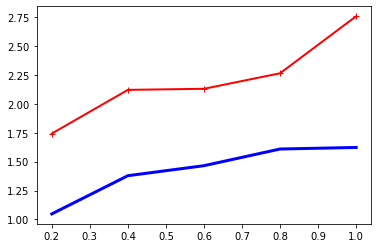

In [83]:
max_value = 1.0
train_sizes = 0.2
number = int(max_value / train_sizes)

train_size_range = np.linspace(train_sizes, max_value, number)
plt.plot (train_size_range, train_poly, "r-+", linewidth = 2, label ='train')
plt.plot(train_size_range , validation_poly, "b-", linewidth = 3 , label = "validation ")  